Heart Disease - Exploratory Data Analysis




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Config
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

In [3]:
# Load the dataset
df = pd.read_csv('../data/raw/heart.csv')

# First look at the data
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Dataset shape: (1025, 14)

First few rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
# Check target variable distribution
print("Target variable distribution:")
print(df['target'].value_counts())
print(f"\nPercentage with heart disease: {df['target'].mean()*100:.1f}%")


Target variable distribution:
target
1    526
0    499
Name: count, dtype: int64

Percentage with heart disease: 51.3%


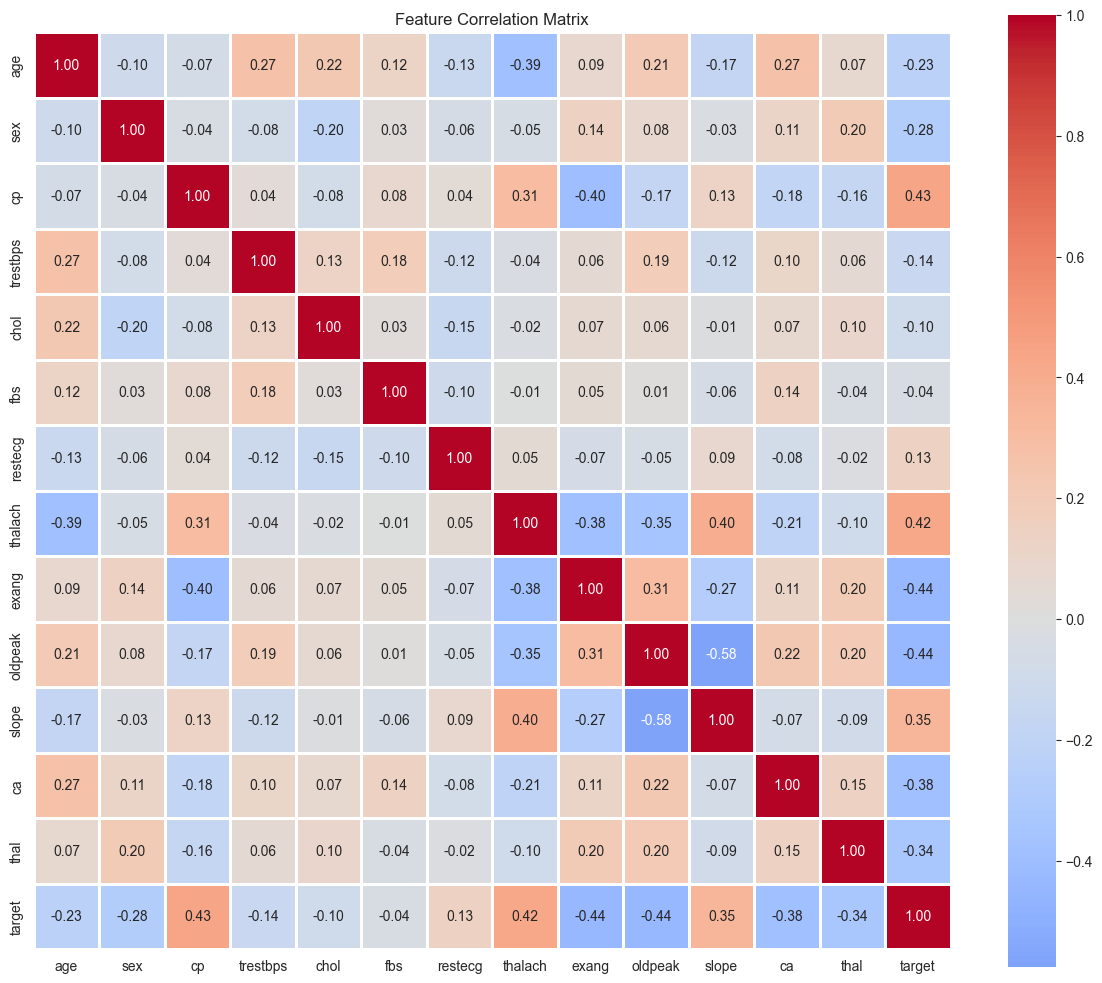


Features most correlated with heart disease:
target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


In [6]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Features most correlated with target
print("\nFeatures most correlated with heart disease:")
target_corr = correlation_matrix['target'].sort_values(ascending=False)
print(target_corr)

## Key Findings

**Strongest predictors:**
- cp (chest pain type): 0.43
- thalach (max heart rate): 0.42  
- slope: 0.35

**Negative correlations:**
- oldpeak (ST depression): -0.43
- exang (exercise angina): -0.44
- ca (number of vessels): -0.39

cp and thalach show some correlation (0.39), might be worth monitoring for multicollinearity in linear models.

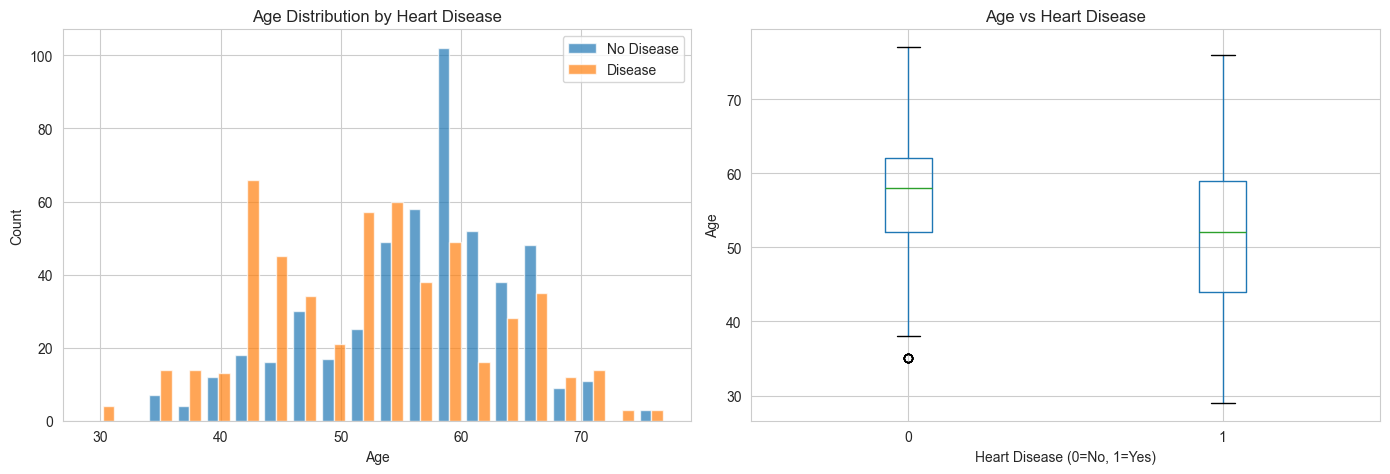

Average age with disease: 52.4
Average age without disease: 56.6


In [7]:
# Age distribution by target
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist([df[df['target']==0]['age'], df[df['target']==1]['age']], 
             label=['No Disease', 'Disease'], bins=20, alpha=0.7)
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].set_title('Age Distribution by Heart Disease')
axes[0].legend()

# Box plot
df.boxplot(column='age', by='target', ax=axes[1])
axes[1].set_xlabel('Heart Disease (0=No, 1=Yes)')
axes[1].set_ylabel('Age')
axes[1].set_title('Age vs Heart Disease')
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

print(f"Average age with disease: {df[df['target']==1]['age'].mean():.1f}")
print(f"Average age without disease: {df[df['target']==0]['age'].mean():.1f}")

<Figure size 1000x500 with 0 Axes>

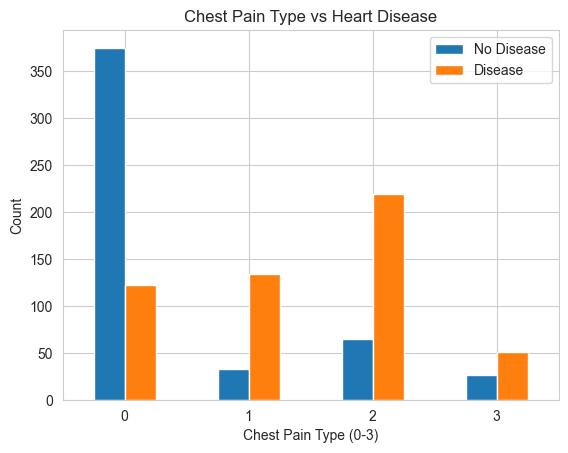

Chest pain distribution:
target     0     1
cp                
0       0.75  0.25
1       0.20  0.80
2       0.23  0.77
3       0.34  0.66


In [8]:
# Chest pain type analysis
plt.figure(figsize=(10, 5))
pd.crosstab(df['cp'], df['target']).plot(kind='bar', stacked=False)
plt.xlabel('Chest Pain Type (0-3)')
plt.ylabel('Count')
plt.title('Chest Pain Type vs Heart Disease')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0)
plt.show()

print("Chest pain distribution:")
print(pd.crosstab(df['cp'], df['target'], normalize='index').round(2))


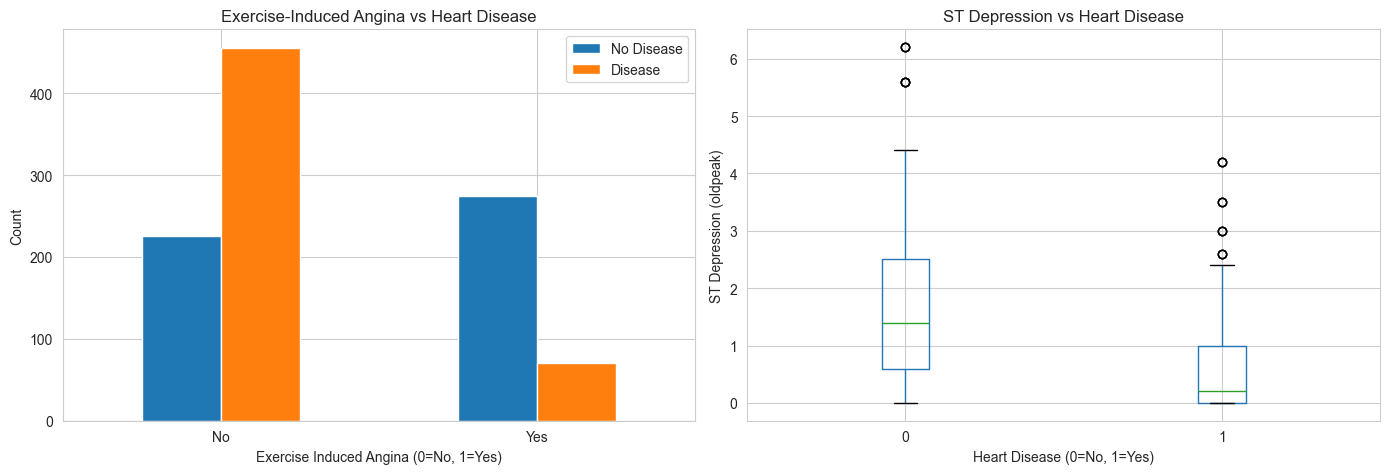

Exercise-induced angina distribution:
target     0     1
exang             
0       0.33  0.67
1       0.79  0.21

Average ST depression with disease: 0.57
Average ST depression without disease: 1.60


In [9]:
# Exercise-induced angina
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot for exang
pd.crosstab(df['exang'], df['target']).plot(kind='bar', stacked=False, ax=axes[0])
axes[0].set_xlabel('Exercise Induced Angina (0=No, 1=Yes)')
axes[0].set_ylabel('Count')
axes[0].set_title('Exercise-Induced Angina vs Heart Disease')
axes[0].legend(['No Disease', 'Disease'])
axes[0].set_xticklabels(['No', 'Yes'], rotation=0)

# ST depression (oldpeak) distribution
df.boxplot(column='oldpeak', by='target', ax=axes[1])
axes[1].set_xlabel('Heart Disease (0=No, 1=Yes)')
axes[1].set_ylabel('ST Depression (oldpeak)')
axes[1].set_title('ST Depression vs Heart Disease')
plt.suptitle('')

plt.tight_layout()
plt.show()

print("Exercise-induced angina distribution:")
print(pd.crosstab(df['exang'], df['target'], normalize='index').round(2))
print(f"\nAverage ST depression with disease: {df[df['target']==1]['oldpeak'].mean():.2f}")
print(f"Average ST depression without disease: {df[df['target']==0]['oldpeak'].mean():.2f}")

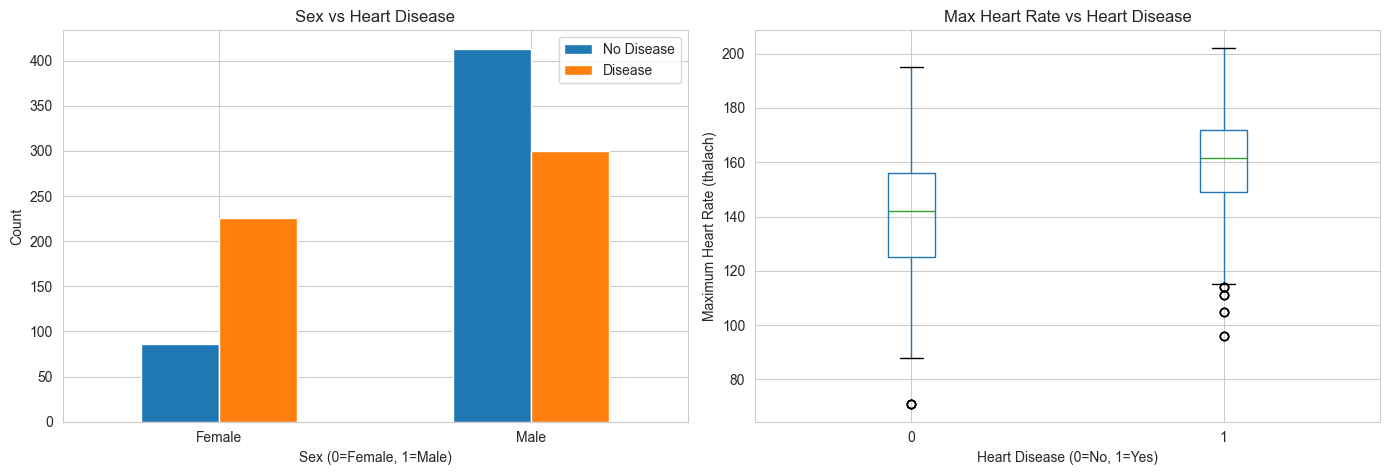

Sex distribution:
target     0     1
sex               
0       0.28  0.72
1       0.58  0.42

Average max HR with disease: 158.6
Average max HR without disease: 139.1


In [10]:
# Sex and max heart rate analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sex distribution
pd.crosstab(df['sex'], df['target']).plot(kind='bar', stacked=False, ax=axes[0])
axes[0].set_xlabel('Sex (0=Female, 1=Male)')
axes[0].set_ylabel('Count')
axes[0].set_title('Sex vs Heart Disease')
axes[0].legend(['No Disease', 'Disease'])
axes[0].set_xticklabels(['Female', 'Male'], rotation=0)

# Max heart rate (thalach)
df.boxplot(column='thalach', by='target', ax=axes[1])
axes[1].set_xlabel('Heart Disease (0=No, 1=Yes)')
axes[1].set_ylabel('Maximum Heart Rate (thalach)')
axes[1].set_title('Max Heart Rate vs Heart Disease')
plt.suptitle('')

plt.tight_layout()
plt.show()

print("Sex distribution:")
print(pd.crosstab(df['sex'], df['target'], normalize='index').round(2))
print(f"\nAverage max HR with disease: {df[df['target']==1]['thalach'].mean():.1f}")
print(f"Average max HR without disease: {df[df['target']==0]['thalach'].mean():.1f}")

In [12]:
print("Unique values in 'ca':")
print(df['ca'].value_counts().sort_index())

Unique values in 'ca':
ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64


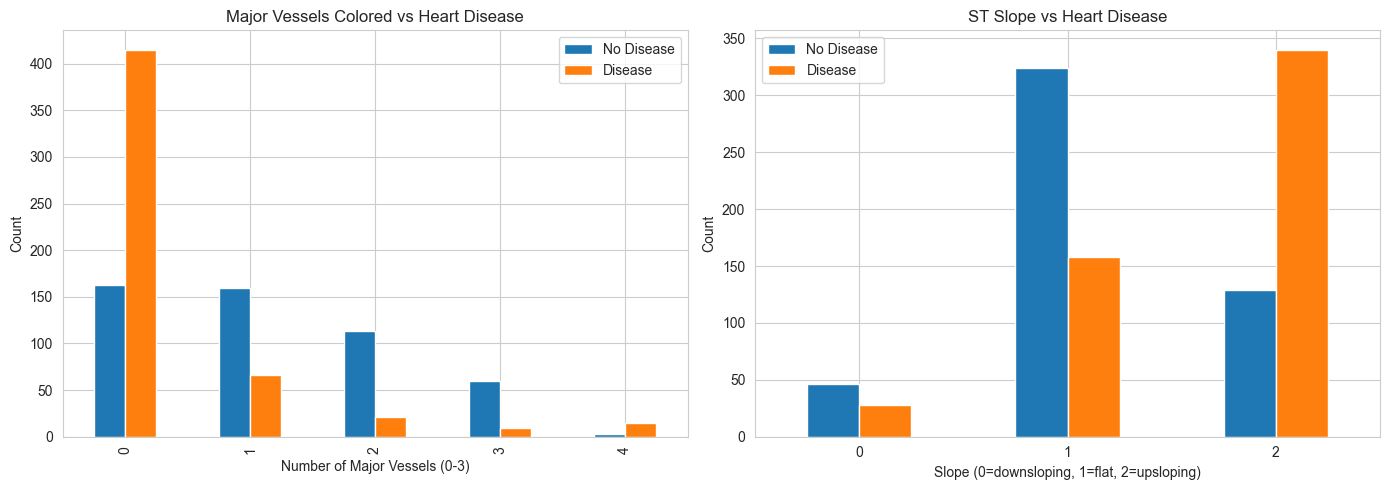

CA (vessels) distribution:
target     0     1
ca                
0       0.28  0.72
1       0.71  0.29
2       0.84  0.16
3       0.87  0.13
4       0.17  0.83

Slope distribution:
target     0     1
slope             
0       0.62  0.38
1       0.67  0.33
2       0.28  0.72


In [14]:
# Number of vessels (ca) and ST slope analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Number of vessels (ca)
pd.crosstab(df['ca'], df['target']).plot(kind='bar', stacked=False, ax=axes[0])
axes[0].set_xlabel('Number of Major Vessels (0-3)')
axes[0].set_ylabel('Count')
axes[0].set_title('Major Vessels Colored vs Heart Disease')
axes[0].legend(['No Disease', 'Disease'])
#axes[0].set_xticklabels(['0', '1', '2', '3','4'], rotation=0)

# Slope of ST segment
pd.crosstab(df['slope'], df['target']).plot(kind='bar', stacked=False, ax=axes[1])
axes[1].set_xlabel('Slope (0=downsloping, 1=flat, 2=upsloping)')
axes[1].set_ylabel('Count')
axes[1].set_title('ST Slope vs Heart Disease')
axes[1].legend(['No Disease', 'Disease'])
axes[1].set_xticklabels(['0', '1', '2'], rotation=0)

plt.tight_layout()
plt.show()

print("CA (vessels) distribution:")
print(pd.crosstab(df['ca'], df['target'], normalize='index').round(2))
print("\nSlope distribution:")
print(pd.crosstab(df['slope'], df['target'], normalize='index').round(2))

In [15]:
print("CA distribution:")
print(pd.crosstab(df['ca'], df['target'], normalize='index').round(2))

CA distribution:
target     0     1
ca                
0       0.28  0.72
1       0.71  0.29
2       0.84  0.16
3       0.87  0.13
4       0.17  0.83


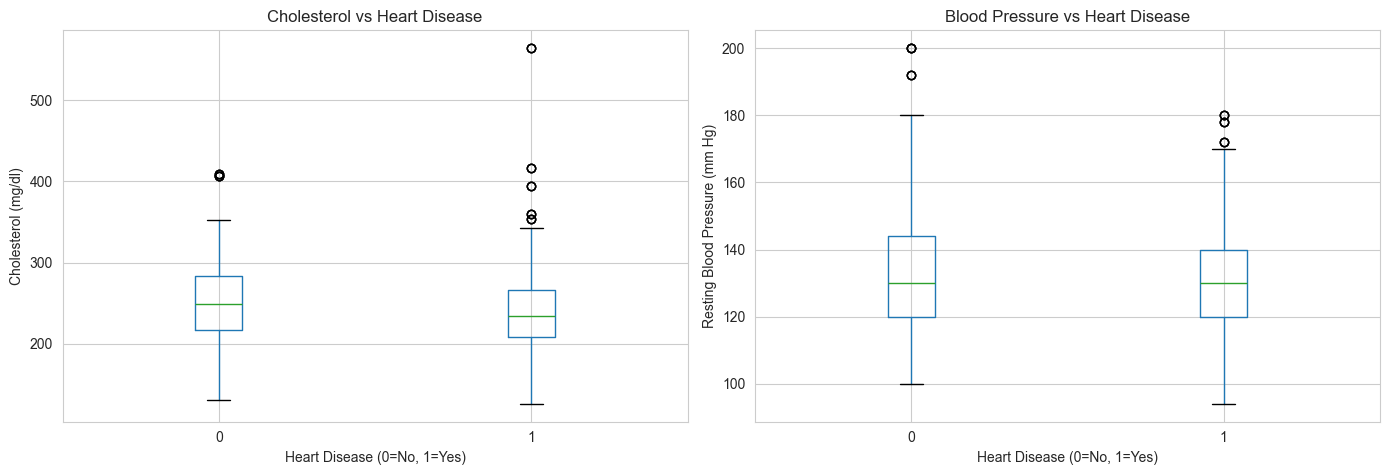

Average cholesterol with disease: 241.0
Average cholesterol without disease: 251.3

Average BP with disease: 129.2
Average BP without disease: 134.1


In [16]:
# Cholesterol and blood pressure
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Cholesterol
df.boxplot(column='chol', by='target', ax=axes[0])
axes[0].set_xlabel('Heart Disease (0=No, 1=Yes)')
axes[0].set_ylabel('Cholesterol (mg/dl)')
axes[0].set_title('Cholesterol vs Heart Disease')
plt.suptitle('')

# Resting blood pressure
df.boxplot(column='trestbps', by='target', ax=axes[1])
axes[1].set_xlabel('Heart Disease (0=No, 1=Yes)')
axes[1].set_ylabel('Resting Blood Pressure (mm Hg)')
axes[1].set_title('Blood Pressure vs Heart Disease')
plt.suptitle('')

plt.tight_layout()
plt.show()

print(f"Average cholesterol with disease: {df[df['target']==1]['chol'].mean():.1f}")
print(f"Average cholesterol without disease: {df[df['target']==0]['chol'].mean():.1f}")
print(f"\nAverage BP with disease: {df[df['target']==1]['trestbps'].mean():.1f}")
print(f"Average BP without disease: {df[df['target']==0]['trestbps'].mean():.1f}")